# ROMY Status File

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import obspy as obs
import matplotlib.colors

from pandas import DataFrame
from andbro__save_to_pickle import __save_to_pickle

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

In [3]:
from functions.load_beat import __load_beat
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals

## Configurations

In [5]:
config = {}


# config['tbeg'] = obs.UTCDateTime(sys.argv[1])
# config['tend'] = obs.UTCDateTime(sys.argv[1])+86400

config['tbeg'] = obs.UTCDateTime("2024-01-10")
config['tend'] = obs.UTCDateTime("2024-01-18")

config['ring'] = "U"

config['path_to_autodata'] = archive_path+f"romy_autodata/"

config['path_to_figures'] = archive_path+f"romy_plots/{config['tbeg'].year}/R{config['ring']}/status/"

config['path_to_output'] = archive_path+f"temp_archive/{config['tbeg'].year}/BW/R{config['ring']}/"

config['fsagnac_rings'] = {"U":303, "V":447.5, "W":447.5, "Z":553.5}
config['fsagnac_nominal'] = config['fsagnac_rings'][config['ring']]

config['DC_threshold'] = 0.1

config['AC_threshold'] = 0.3


### Load MLTI Logs

In [6]:
mlti_log = __load_mlti(config['tbeg'], config['tend'], config['ring'], archive_path)

mlti_t1, mlti_t2 = __get_mlti_intervals(mlti_log.time_utc, time_delta=100)

In [7]:
mlti_log.size

8448

### Load Beat Data

In [8]:
beat = __load_beat(config['tbeg'], config['tend'], config['ring'], config['path_to_autodata'])

In [9]:
beat

,times_utc,times_utc_sec,times_mjd,fj,f1,f2,pz,p1,p2,ac_z,ac_1,ac_2,dc_z,dc_1,dc_2,contrast_z,contrast_1,contrast_2
3,2024-01-10T00:00:30.000000Z,30.0,60319.000347,302.439499,302.439718,302.439851,0.185770,0.003246,0.000733,0.417305,0.029734,0.030670,0.320261,0.221179,0.283005,0.646894,0.067053,0.054098
4,2024-01-10T00:01:30.000000Z,90.0,60319.001042,302.440261,302.440400,302.440365,0.185490,0.003238,0.000755,0.416739,0.031128,0.032174,0.320040,0.221177,0.282698,0.646435,0.070211,0.056805
5,2024-01-10T00:02:30.000000Z,150.0,60319.001736,302.440792,302.440815,302.440565,0.185259,0.003229,0.000779,0.416239,0.031868,0.032936,0.319865,0.221162,0.282456,0.646020,0.071891,0.058187
6,2024-01-10T00:03:30.000000Z,210.0,60319.002431,302.441118,302.441106,302.440853,0.185058,0.003218,0.000801,0.415798,0.031984,0.033045,0.319732,0.221162,0.282274,0.645615,0.072149,0.058406
7,2024-01-10T00:04:30.000000Z,270.0,60319.003125,302.441307,302.441406,302.441091,0.184865,0.003207,0.000830,0.415373,0.031165,0.032269,0.319621,0.221172,0.282150,0.645186,0.070301,0.057067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2024-01-17T23:55:30.000000Z,690930.0,60326.996875,302.412529,302.412554,302.412450,0.229020,0.003035,0.001040,0.507978,0.020264,0.018269,0.297882,0.247959,0.263345,0.851875,0.040832,0.034649
179,2024-01-17T23:56:30.000000Z,690990.0,60326.997569,302.412086,302.412114,302.412079,0.229052,0.003019,0.001027,0.508038,0.020295,0.018272,0.297922,0.247967,0.263438,0.851837,0.040897,0.034652
0,2024-01-17T23:57:30.000000Z,691050.0,60326.998264,302.411860,302.411876,302.411835,0.229082,0.003008,0.001018,0.508106,0.020635,0.018543,0.297963,0.247957,0.263502,0.851862,0.041589,0.035163
1,2024-01-17T23:58:30.000000Z,691110.0,60326.998958,302.411812,302.411821,302.411920,0.229110,0.003006,0.001013,0.508180,0.020599,0.018491,0.297988,0.247954,0.263535,0.851899,0.041522,0.035066


### Define Variables

In [10]:
status = DataFrame()

status['times_utc'] = beat.times_utc
status['times_utc_sec'] = beat.times_utc_sec

N = status.shape[0]

quality = np.ones(N)
fsagnac = np.ones(N)
mlti = np.ones(N)
dc_threshold = np.ones(N)
ac_threshold = np.ones(N)

## Determine Status

In [11]:
idx_mlti = 0

for idx in range(beat.shape[0]):

    _time = obs.UTCDateTime(status.times_utc.iloc[idx])

    ## check if time conincides with MLTI
    # print(_time, mlti_t1[idx_mlti], mlti_t2[idx_mlti])
    if len(mlti_t1) > 0 and len(mlti_t2) > 0:
        if _time >= mlti_t1[idx_mlti] and _time <= mlti_t2[idx_mlti]:
            quality[idx] = 0
            mlti[idx] = 0

        ## update mlti interval
        if _time > mlti_t2[idx_mlti] and idx_mlti < len(mlti_t1)-1:
            idx_mlti += 1

    if beat.fj.iloc[idx] < config['fsagnac_nominal'] - 1.0 or beat.fj.iloc[idx] > config['fsagnac_nominal'] + 1.0:
        quality[idx] = 0
        fsagnac[idx] = 0

    if beat.dc_z.iloc[idx] < config['DC_threshold']:
        quality[idx] = 0
        dc_threshold[idx] = 0

    if beat.ac_z.iloc[idx] < config['AC_threshold']:
        quality[idx] = 0
        ac_threshold[idx] = 0


status['quality'] = quality
status['fsagnac'] = fsagnac
status['mlti'] = mlti
status['ac_threshold'] = ac_threshold
status['dc_threshold'] = dc_threshold


## store output to file
print(f"-> store: {config['path_to_output']}R{config['ring']}_{config['tbeg'].date}_status.pkl")
__save_to_pickle(status, config['path_to_output'],f"R{config['ring']}_{config['tbeg'].date}_status")


-> store: /import/freenas-ffb-01-data/temp_archive/2024/BW/RU/RU_2024-01-10_status.pkl

 -> created:  /import/freenas-ffb-01-data/temp_archive/2024/BW/RU/RU_2024-01-10_status.pkl


### Plotting

In [12]:
arr = np.ones((3, status['quality'].size))

arr[0] *= status['quality']
arr[1] *= status['fsagnac']
arr[2] *= status['mlti']

/tmp/ipykernel_1757701/1349772002.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tcklbls)


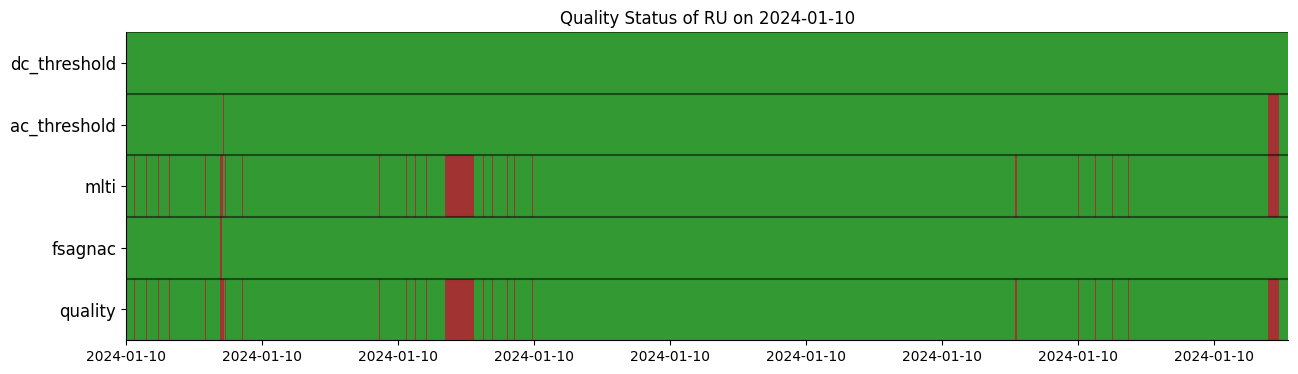

In [13]:
names = ["quality", "fsagnac", "mlti", "ac_threshold", "dc_threshold"]
bars = np.ones(len(names))-0.5

arr = np.ones((len(names), status['quality'].size))

for _n, name in enumerate(names):
    arr[_n] *= status[name]


cmap = matplotlib.colors.ListedColormap(['darkred', 'green'])

font = 12

fig, ax = plt.subplots(1, 1, figsize=(15, 4))

c = ax.pcolormesh(np.arange(0, arr.shape[1])/60, names, arr, cmap=cmap,
                   rasterized=True, alpha=0.8, antialiased=False)

# c = ax.pcolor(beat.times_utc_sec, names, arr, cmap=cmap,
#               rasterized=True, alpha=0.8, antialiased=False)

for _k, bar in enumerate(bars):
    ax.axhline(bar+_k, color="k", alpha=0.5)

# ax.set_xlabel("Time (min)")

ref_date = beat.times_utc.iloc[0]
tcks = ax.get_xticks()
tcklbls = [str((obs.UTCDateTime(ref_date)+t).date) for t in tcks]
ax.set_xticklabels(tcklbls)

ax.tick_params(axis='y', labelsize=font)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title(f"Quality Status of R{config['ring']} on {config['tbeg'].date}")

plt.show();


# print(f" -> stored: {config['path_to_figures']}R{config['ring']}_{config['tbeg'].date}_status.png")
# fig.savefig(config['path_to_figures']+f"R{config['ring']}_{config['tbeg'].date}_status.png", format="png", dpi=100, bbox_inches='tight')